In [497]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd
from config2 import api_key
from pandas_function import make_df
import time
import numpy as np
from scipy.stats import linregress
import statsmodels.formula.api as sm
import statsmodels.api as sm



In [498]:
#Opening files to be used to plot
file_pop = "US_pop_df.csv"
file_air = "LargestUSCitiesDF.csv"

In [499]:
#Converting files to Dataframes
pop_df = pd.read_csv(file_pop, encoding="ISO-8859-1")
air_df = pd.read_csv(file_air, encoding="ISO-8859-1")
pop_df_slim = pop_df[["NAME","POPESTIMATE2018"]]
pop_df_slim = pop_df_slim.rename(columns={"NAME":"City","POPESTIMATE2018":"Population"})

In [500]:
#Merging the two dataframs using City as the primary variable
main_df = pd.merge(air_df, pop_df_slim, on='City')

In [501]:
#Summary Statistics for the variables
summary_df=main_df.describe()
summary_df=summary_df[["Longitude","Latitude","Air Quality","Humidity","Pressure","Wind Speed","Population"]]
summary_df=summary_df[1:]

In [502]:
#Reformating the summary stat table
summary_df["Longitude"] = summary_df["Longitude"].astype(float).map("{:.2f}".format)
summary_df["Latitude"] = summary_df["Latitude"].astype(float).map("{:.2f}".format)
summary_df["Air Quality"] = summary_df["Air Quality"].astype(float).map("{:.2f}".format)
summary_df["Pressure"] = summary_df["Pressure"].astype(float).map("{:.2f}".format)
summary_df["Wind Speed"] = summary_df["Wind Speed"].astype(float).map("{:.2f}".format)
summary_df["Humidity"] = summary_df["Humidity"].astype(float).map("{:.2f}".format)
summary_df["Population"] = summary_df["Population"].astype(float).map("{:.2f}".format)
summary_df

,Longitude,Latitude,Air Quality,Humidity,Pressure,Wind Speed,Population
mean,-97.50,36.46,20.71,49.65,1017.10,3.59,1006967.47
std,16.02,4.77,13.58,24.51,4.08,1.50,1267638.75
min,-122.64,25.79,0.00,6.00,1010.00,0.24,389255.00
25%,-111.87,32.82,11.00,33.00,1013.00,2.60,472688.00
50%,-96.86,36.21,21.00,45.00,1018.00,3.60,649021.00
75%,-83.07,39.79,27.00,69.00,1021.00,4.60,895008.00
max,-71.05,47.57,62.00,100.00,1023.00,6.70,8398748.00


In [503]:
#Creating Lists from Datafram to run plots and analysis
Air_Quality_data = main_df["Air Quality"]
Humidity_data = main_df["Humidity"]
Pressure_data = main_df["Pressure"]
Wind_Speed_data = main_df["Wind Speed"]
Population_data = main_df["Population"]

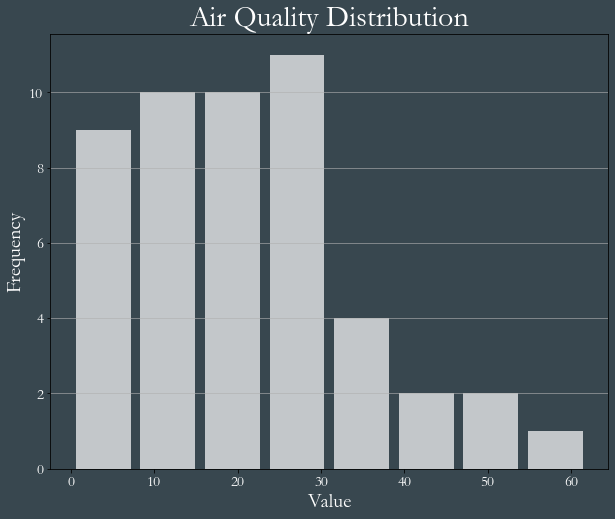

In [504]:
#Air Quality Distribution Chart
plt.figure(figsize=[10,8],facecolor=(0.22,0.28,0.31))
n, bins, patches = plt.hist(x=Air_Quality_data, bins=8, color='1',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=20,fontname="Garamond",color='white')
plt.ylabel('Frequency',fontsize=20,fontname="Garamond",color='white')
plt.xticks(fontsize=15,fontname="Garamond",color='white')
plt.yticks(fontsize=15,fontname="Garamond",color='white')
plt.title('Air Quality Distribution',fontsize=30,fontname="Garamond",color='white')
ax = plt.gca()
ax.set_facecolor((0.22, 0.28,0.31))
plt.savefig("Air Quality Distribution.png")
plt.show()


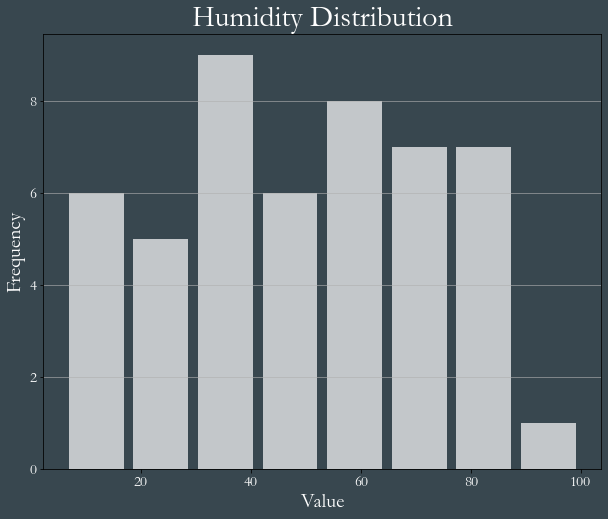

In [505]:
#Humidity Distriution Chart
plt.figure(figsize=[10,8],facecolor=(0.22,0.28,0.31))
n, bins, patches = plt.hist(x=Humidity_data, bins=8, color='1',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=20,fontname="Garamond",color='white')
plt.ylabel('Frequency',fontsize=20,fontname="Garamond",color='white')
plt.xticks(fontsize=15,fontname="Garamond",color='white')
plt.yticks(fontsize=15,fontname="Garamond",color='white')
plt.title('Humidity Distribution',fontsize=30,fontname="Garamond",color='white')
ax = plt.gca()
ax.set_facecolor((0.22, 0.28,0.31))
plt.savefig("Humidity Distribution.png")
plt.show()


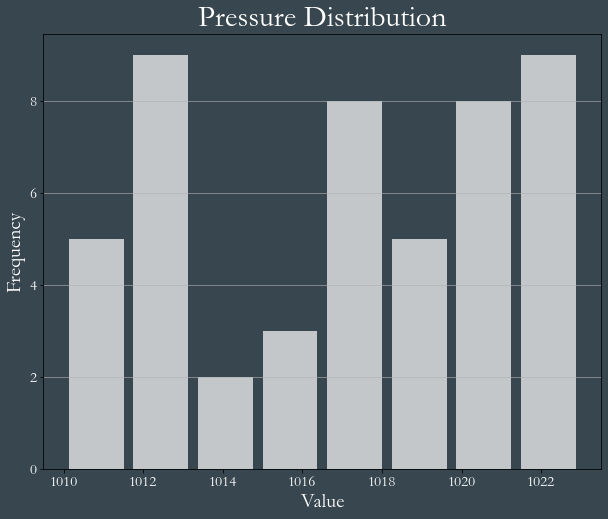

In [506]:
#Pressure Distriution Chart
plt.figure(figsize=[10,8],facecolor=(0.22,0.28,0.31))
n, bins, patches = plt.hist(x=Pressure_data, bins=8, color='1',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=20,fontname="Garamond",color='white')
plt.ylabel('Frequency',fontsize=20,fontname="Garamond",color='white')
plt.xticks(fontsize=15,fontname="Garamond",color='white')
plt.yticks(fontsize=15,fontname="Garamond",color='white')
plt.title('Pressure Distribution',fontsize=30,fontname="Garamond",color='white')
ax = plt.gca()
ax.set_facecolor((0.22, 0.28,0.31))
plt.savefig("Pressure Distribution.png")
plt.show()


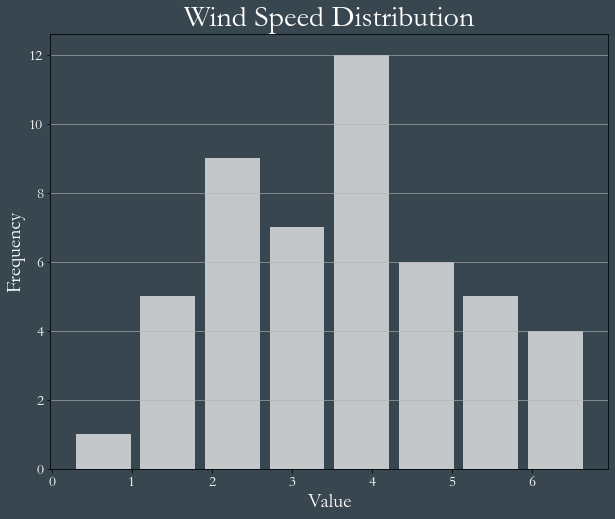

In [507]:
#Wind Speed Distriution Chart
plt.figure(figsize=[10,8],facecolor=(0.22,0.28,0.31))
n, bins, patches = plt.hist(x=Wind_Speed_data, bins=8, color='1',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=20,fontname="Garamond",color='white')
plt.ylabel('Frequency',fontsize=20,fontname="Garamond",color='white')
plt.xticks(fontsize=15,fontname="Garamond",color='white')
plt.yticks(fontsize=15,fontname="Garamond",color='white')
plt.title('Wind Speed Distribution',fontsize=30,fontname="Garamond",color='white')
ax = plt.gca()
ax.set_facecolor((0.22, 0.28,0.31))
plt.savefig("Wind Speed Distribution.png")
plt.show()


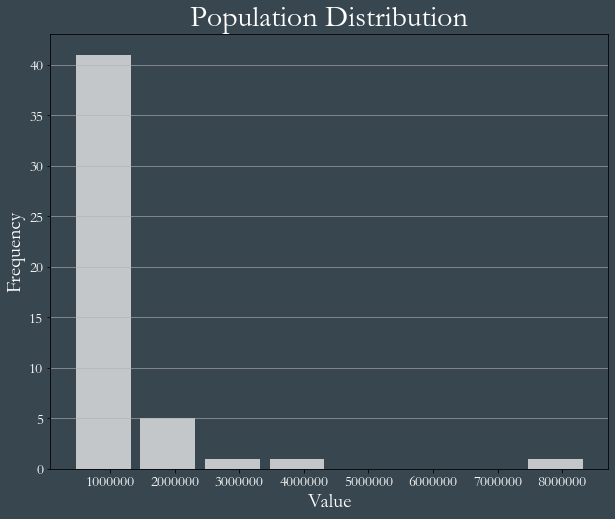

In [508]:
#Population Distriution Chart
plt.figure(figsize=[10,8],facecolor=(0.22,0.28,0.31))
n, bins, patches = plt.hist(x=Population_data, bins=8, color='1',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=20,fontname="Garamond",color='white')
plt.ylabel('Frequency',fontsize=20,fontname="Garamond",color='white')
plt.xticks(fontsize=15,fontname="Garamond",color='white')
plt.yticks(fontsize=15,fontname="Garamond",color='white')
plt.title('Population Distribution',fontsize=30,fontname="Garamond",color='white')
ax = plt.gca()
ax.set_facecolor((0.22, 0.28,0.31))
plt.savefig("Population Distribution.png")
plt.show()


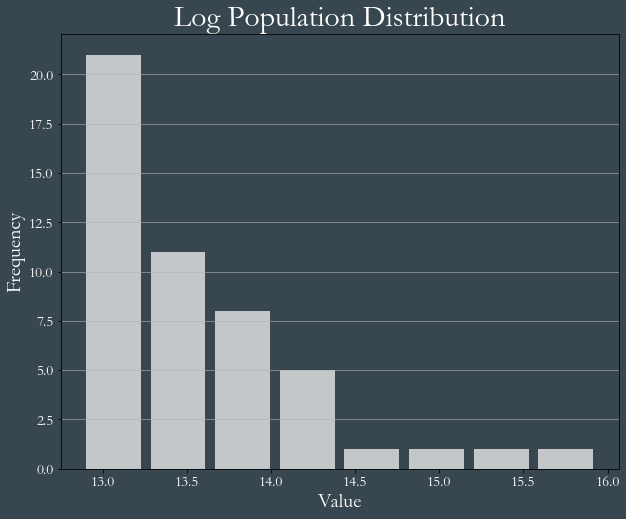

In [509]:
#Log of Population Distribution Charts
plt.figure(figsize=[10,8],facecolor=(0.22,0.28,0.31))
n, bins, patches = plt.hist(x=np.log(Population_data), bins=8, color='1',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=20,fontname="Garamond",color='white')
plt.ylabel('Frequency',fontsize=20,fontname="Garamond",color='white')
plt.xticks(fontsize=15,fontname="Garamond",color='white')
plt.yticks(fontsize=15,fontname="Garamond",color='white')
plt.title('Log Population Distribution',fontsize=30,fontname="Garamond",color='white')
ax = plt.gca()
ax.set_facecolor((0.22, 0.28,0.31))
plt.savefig("Log Population Distribution.png")
plt.show()


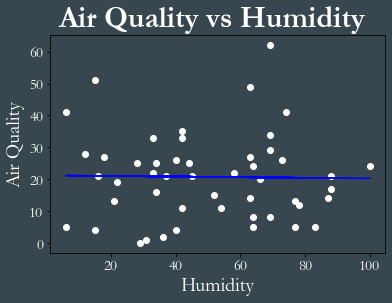

In [510]:
#Air Quality vs Humidity Scatter Plot
x_axis = Humidity_data
y_axis = Air_Quality_data
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
fig, ax = plt.subplots(facecolor=(0.22,0.28,0.31))

fig.suptitle("Air Quality vs Humidity", fontsize=30, fontweight="bold",fontname="Garamond",color="white")

ax.set_ylabel("Air Quality",fontsize=20,fontname="Garamond",color="white")
plt.xlabel('Humidity',fontsize=20,fontname="Garamond",color="white")
ax.plot(x_axis, y_axis, linewidth=0, marker='o',color="white")
ax.plot(x_axis, fit, 'b--')
plt.xticks(fontsize=15,fontname="Garamond",color="white")
plt.yticks(fontsize=15,fontname="Garamond",color="white")
ax = plt.gca()
ax.set_facecolor((0.22, 0.28,0.31))
plt.savefig("US - Air vs Humidity.png")
plt.show()


In [511]:
#Air Quality vs Humidity Regression Results
model = sm.OLS(y_axis, x_axis).fit()
predictions = model.predict(x_axis) # make the predictions by the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Air Quality   R-squared (uncentered):                   0.562
Model:                            OLS   Adj. R-squared (uncentered):              0.553
Method:                 Least Squares   F-statistic:                              61.57
Date:                Wed, 09 Oct 2019   Prob (F-statistic):                    3.76e-10
Time:                        19:09:20   Log-Likelihood:                         -206.42
No. Observations:                  49   AIC:                                      414.8
Df Residuals:                      48   BIC:                                      416.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Humidity       0.3349      0.043      7.846      0.000       0.249       0.421
==============================================================================
Omnibus:                        2.966   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.227   Jarque-Bera (JB):                2.597
Skew:                           0.561   Prob(JB):                        0.273
Kurtosis:                       2.883   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

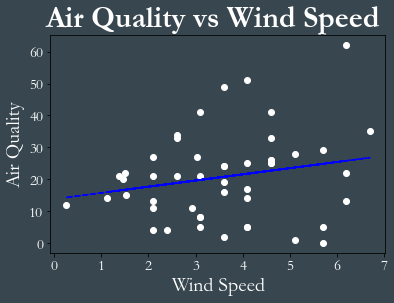

In [512]:
#Air Quality vs Wind Speed Scatter Plot
x_axis = Wind_Speed_data
y_axis = Air_Quality_data
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
fig, ax = plt.subplots(facecolor=(0.22,0.28,0.31))

fig.suptitle("Air Quality vs Wind Speed", fontsize=30,fontname="Garamond", fontweight="bold",color="white")

ax.set_ylabel("Air Quality",fontsize=20,fontname="Garamond",color="white")
plt.xlabel('Wind Speed',fontsize=20,fontname="Garamond",color="white")
ax.plot(x_axis, y_axis, linewidth=0, marker='o',color="white")
ax.plot(x_axis, fit, 'b--')
plt.xticks(fontsize=15,fontname="Garamond",color="white")
plt.yticks(fontsize=15,fontname="Garamond",color="white")
ax = plt.gca()
ax.set_facecolor((0.22, 0.28,0.31))
plt.savefig("US - Air vs Wind Speed.png")
plt.show()


In [513]:
#Air Quality vs Wind Speed Regression Results
model = sm.OLS(y_axis, x_axis).fit()
predictions = model.predict(x_axis) # make the predictions by the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Air Quality   R-squared (uncentered):                   0.672
Model:                            OLS   Adj. R-squared (uncentered):              0.665
Method:                 Least Squares   F-statistic:                              98.25
Date:                Wed, 09 Oct 2019   Prob (F-statistic):                    3.38e-13
Time:                        19:09:21   Log-Likelihood:                         -199.35
No. Observations:                  49   AIC:                                      400.7
Df Residuals:                      48   BIC:                                      402.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Wind Speed     5.2109      0.526      9.912      0.000       4.154       6.268
==============================================================================
Omnibus:                        0.042   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.979   Jarque-Bera (JB):                0.142
Skew:                          -0.064   Prob(JB):                        0.932
Kurtosis:                       2.770   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

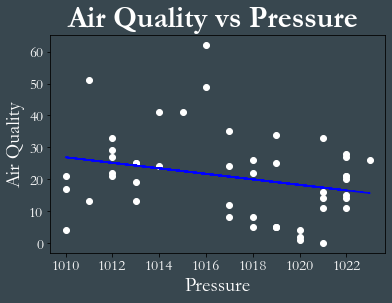

In [514]:
#Air Quality vs Pressure Scatter Plot
x_axis = Pressure_data
y_axis = Air_Quality_data
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
fig, ax = plt.subplots(facecolor=(0.22,0.28,0.31))

fig.suptitle("Air Quality vs Pressure", fontsize=30,fontname="Garamond", fontweight="bold",color="white")

ax.set_ylabel("Air Quality",fontsize=20,fontname="Garamond",color="white")
plt.xlabel('Pressure',fontsize=20,fontname="Garamond",color="white")
ax.plot(x_axis, y_axis, linewidth=0, marker='o',color="white")
ax.plot(x_axis, fit, 'b--')
plt.xticks(fontsize=15,fontname="Garamond",color="white")
plt.yticks(fontsize=15,fontname="Garamond",color="white")
ax = plt.gca()
ax.set_facecolor((0.22, 0.28,0.31))
plt.savefig("US - Air vs Pressure.png")
plt.show()


In [515]:
#Air Quality vs Pressure Regression Results
model = sm.OLS(y_axis, x_axis).fit()
predictions = model.predict(x_axis) # make the predictions by the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Air Quality   R-squared (uncentered):                   0.703
Model:                            OLS   Adj. R-squared (uncentered):              0.697
Method:                 Least Squares   F-statistic:                              113.5
Date:                Wed, 09 Oct 2019   Prob (F-statistic):                    3.04e-14
Time:                        19:09:22   Log-Likelihood:                         -196.91
No. Observations:                  49   AIC:                                      395.8
Df Residuals:                      48   BIC:                                      397.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Pressure       0.0204      0.002     10.656      0.000       0.017       0.024
==============================================================================
Omnibus:                        6.772   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                5.694
Skew:                           0.773   Prob(JB):                       0.0580
Kurtosis:                       3.630   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 1440x720 with 0 Axes>

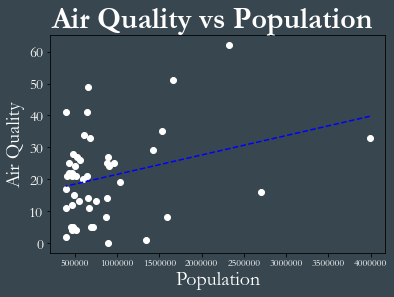

In [516]:
#Air Quality vs Population Scatter Plot
plt.figure(figsize=[20,10])
x_axis = Population_data[1:]
y_axis = Air_Quality_data[1:]
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
fig, ax = plt.subplots(facecolor=(0.22,0.28,0.31))

fig.suptitle("Air Quality vs Population", fontsize=30,fontname="Garamond", fontweight="bold",color="white")
ax.set_ylabel("Air Quality",fontsize=20,fontname="Garamond",color="white")
plt.xlabel('Population',fontsize=20,fontname="Garamond",color="white")
ax.plot(x_axis, y_axis, linewidth=0, marker='o',color="white")
ax.plot(x_axis, fit, 'b--')
plt.xticks(fontsize=10,fontname="Garamond",color="white")
plt.yticks(fontsize=15,fontname="Garamond",color="white")
ax = plt.gca()
ax.set_facecolor((0.22, 0.28,0.31))
plt.savefig("Air vs Population.png")
plt.show()


In [517]:
#Air Quality vs Population Regression Results
model = sm.OLS(y_axis, x_axis).fit()
predictions = model.predict(x_axis) # make the predictions by the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Air Quality   R-squared (uncentered):                   0.577
Model:                            OLS   Adj. R-squared (uncentered):              0.568
Method:                 Least Squares   F-statistic:                              64.11
Date:                Wed, 09 Oct 2019   Prob (F-statistic):                    2.49e-10
Time:                        19:09:25   Log-Likelihood:                         -201.32
No. Observations:                  48   AIC:                                      404.6
Df Residuals:                      47   BIC:                                      406.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Population   1.73e-05   2.16e-06      8.007      0.000     1.3e-05    2.16e-05
==============================================================================
Omnibus:                        4.253   Durbin-Watson:                   1.462
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                3.100
Skew:                          -0.535   Prob(JB):                        0.212
Kurtosis:                       3.635   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

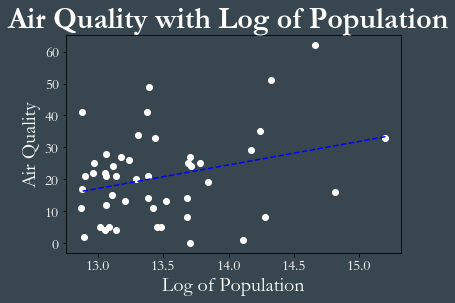

In [518]:
#Air Quality vs Log of Population Scatter Plot
Log_Population_data = np.log(Population_data)
x_axis = Log_Population_data[1:]
y_axis = Air_Quality_data[1:]
(slope, intercept, _, _, _) = linregress(x_axis, y_axis)
fit = slope * x_axis + intercept
fig, ax = plt.subplots(facecolor=(0.22,0.28,0.31))
fig.suptitle("Air Quality with Log of Population", fontsize=30,fontname="Garamond", fontweight="bold",color="white")
ax.set_ylabel("Air Quality",fontsize=20,fontname="Garamond",color="white")
plt.xlabel('Log of Population',fontsize=20,fontname="Garamond",color="white")
ax.plot(x_axis, y_axis, linewidth=0, marker='o',color="white")
ax.plot(x_axis, fit, 'b--')
plt.xticks(fontsize=15,fontname="Garamond",color="white")
plt.yticks(fontsize=15,fontname="Garamond",color="white")
ax = plt.gca()
ax.set_facecolor((0.22, 0.28,0.31))
plt.savefig("Air vs Log of Population.png")
plt.show()


In [519]:
#Air Quality vs Log of Population Regression Results
model = sm.OLS(y_axis, x_axis).fit()
predictions = model.predict(x_axis) # make the predictions by the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            Air Quality   R-squared (uncentered):                   0.708
Model:                            OLS   Adj. R-squared (uncentered):              0.701
Method:                 Least Squares   F-statistic:                              113.7
Date:                Wed, 09 Oct 2019   Prob (F-statistic):                    3.87e-14
Time:                        19:09:26   Log-Likelihood:                         -192.46
No. Observations:                  48   AIC:                                      386.9
Df Residuals:                      47   BIC:                                      388.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Population     1.5380      0.144     10.663      0.000       1.248       1.828
==============================================================================
Omnibus:                        5.744   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                4.694
Skew:                           0.732   Prob(JB):                       0.0956
Kurtosis:                       3.453   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

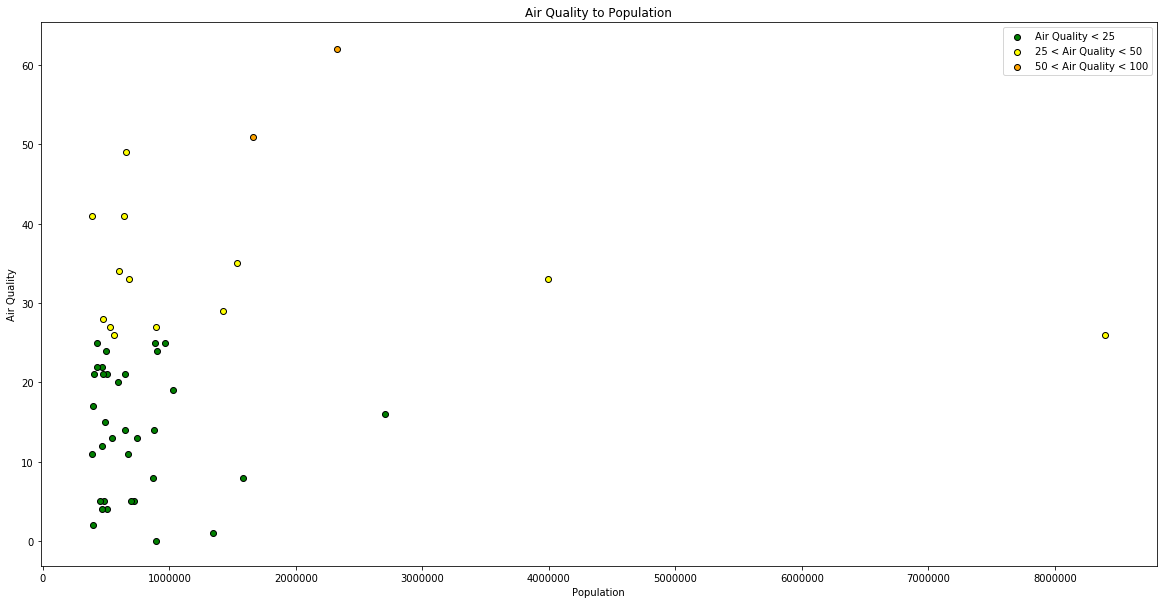

In [520]:
plt.figure(figsize=[20,10])
plt.scatter(great_air['Population'], great_air['Air Quality'], marker="o", facecolors="green", edgecolors="black", label = "Air Quality < 25")
plt.scatter(good_air['Population'], good_air['Air Quality'], marker="o", facecolors="yellow", edgecolors="black", label = "25 < Air Quality < 50")
plt.scatter(med_air['Population'], med_air['Air Quality'], marker="o", facecolors="orange", edgecolors="black", label = "50 < Air Quality < 100")
plt.title("Air Quality to Population")
plt.xlabel("Population")
plt.ylabel("Air Quality")
plt.legend(loc="best")
plt.savefig("Output/InternationalAirQualitytoPopulation.png")

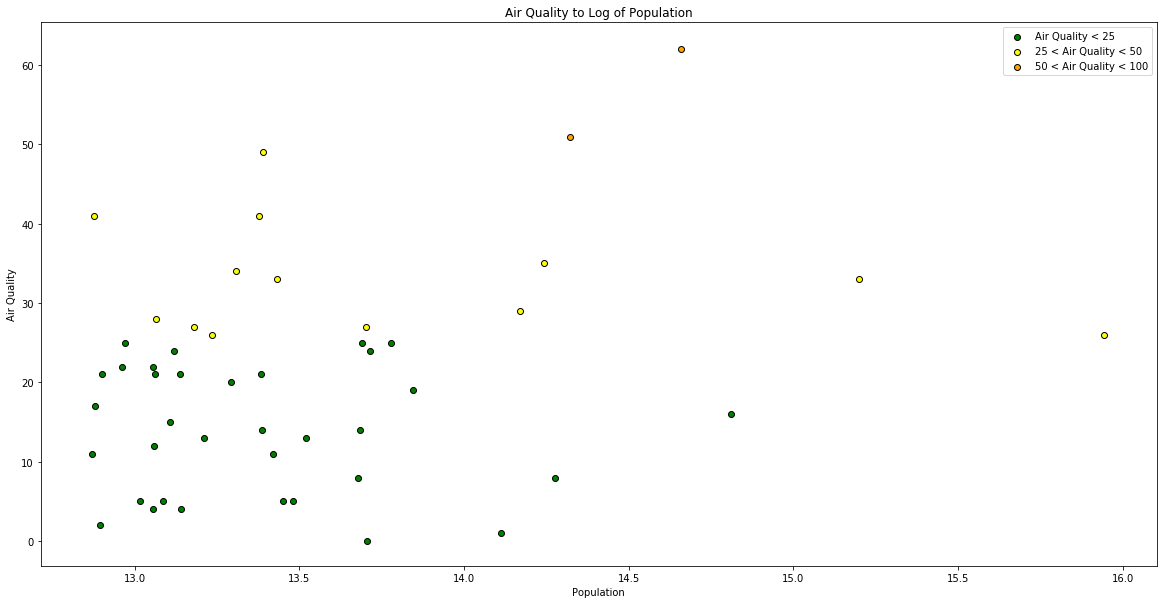

In [521]:
plt.figure(figsize=[20,10])
plt.scatter(np.log(great_air['Population']), great_air['Air Quality'], marker="o", facecolors="green", edgecolors="black", label = "Air Quality < 25")
plt.scatter(np.log(good_air['Population']), good_air['Air Quality'], marker="o", facecolors="yellow", edgecolors="black", label = "25 < Air Quality < 50")
plt.scatter(np.log(med_air['Population']), med_air['Air Quality'], marker="o", facecolors="orange", edgecolors="black", label = "50 < Air Quality < 100")
plt.title("Air Quality to Log of Population")
plt.xlabel("Population")
plt.ylabel("Air Quality")
plt.legend(loc="best")
plt.savefig("Output/InternationalAirQualitytoPopulation.png")

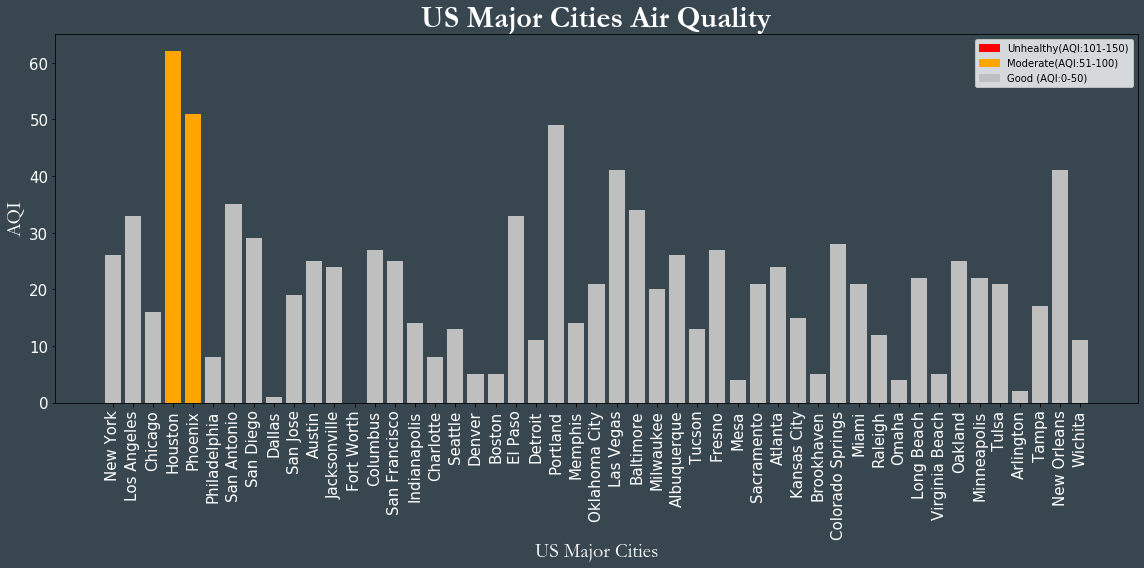

In [522]:
# Bar Chart of Air Quality by City
plt.figure(figsize=(16,8),facecolor=(0.22,0.28,0.31))

colors = ["0.75" if x <= 50 else "orange" if x <= 100 else "red" for x in main_df["Air Quality"]]
plt.bar(main_df["City"], main_df["Air Quality"], align="center", color = colors)

plt.yticks(color="white",fontsize=15)
plt.xticks(main_df["City"], rotation = 90,color="white",fontsize=15)
plt.title("US Major Cities Air Quality", fontweight="bold", fontsize=30,fontname="Garamond",color="white")
plt.ylabel("AQI", fontsize=20,fontname="Garamond",color="white")
plt.xlabel("US Major Cities", fontsize=20,fontname="Garamond",color="white")


colors1 = {"Unhealthy(AQI:101-150)": "red", "Moderate(AQI:51-100)": "orange", "Good (AQI:0-50)": "0.75"}
labels = list(colors1.keys())
handles= [plt.Rectangle((0,0),1,1, color=colors1[label]) for label in labels]
plt.legend(handles,labels)

ax = plt.gca()
ax.set_facecolor((0.22, 0.28,0.31))


plt.tight_layout()
plt.savefig("BarCartUSMajorCities.png")
plt.show()